## Пространственная эконометрика (Средняя зарплата по регионам России, февраль 2025)

**Цель**:
Анализировать пространственное распределение зарплат по регионам РФ, выявить кластеры с помощью Moran’s I и LISA.

In [2]:
import geopandas as gpd
gdf = gpd.read_file("/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/gadm41_RUS_shp/gadm41_RUS_1.shp")
gdf.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"POLYGON ((40.38721 44.67212, 40.37504 44.64233..."
1,RUS.2_1,RUS,Russia,Altay,Altayskiy Kray,Алтайский край,Kray,Territory,NA,RU.AL,NA,"POLYGON ((82.74661 50.94901, 82.73914 50.94797..."
2,RUS.3_1,RUS,Russia,Amur,Amurskaya Oblast,Амурская область,Oblast,Region,NA,RU.AM,NA,"POLYGON ((130.50304 48.85646, 130.48853 48.863..."
3,RUS.4_1,RUS,Russia,Arkhangel'sk,Arcangelo|Archangel|Archangelsk|,Архангельская область,Oblast,Region,NA,RU.AR,NA,"MULTIPOLYGON (((44.51251 60.93196, 44.38121 60..."
4,RUS.5_1,RUS,Russia,Astrakhan',Astrachan|Astrakhanskaya Oblast,Астраханская область,Oblast,Region,NA,RU.AS,NA,"POLYGON ((47.87494 45.56921, 47.84983 45.5592,..."


In [5]:
import geopandas as gpd
gdf = gpd.read_file("/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/gadm41_RUS_shp/gadm41_RUS_1.shp")
gdf[['NAME_1']]
# .head()


,NAME_1
0,Adygey
1,Altay
2,Amur
3,Arkhangel'sk
4,Astrakhan'
...,...
78,Voronezh
79,Yamal-Nenets
80,Yaroslavl'
81,Yevrey


/var/folders/7t/2whf0csn0sv_6vf7c3q2lbv40000gq/T/ipykernel_96538/467513261.py:20: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.contiguity.Queen.from_dataframe(gdf)
/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 17, 20, 49.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/.venv/lib/python3.12/site-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
📌 Global Moran’s I: 0.2970
   p-value: 0.0030


/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


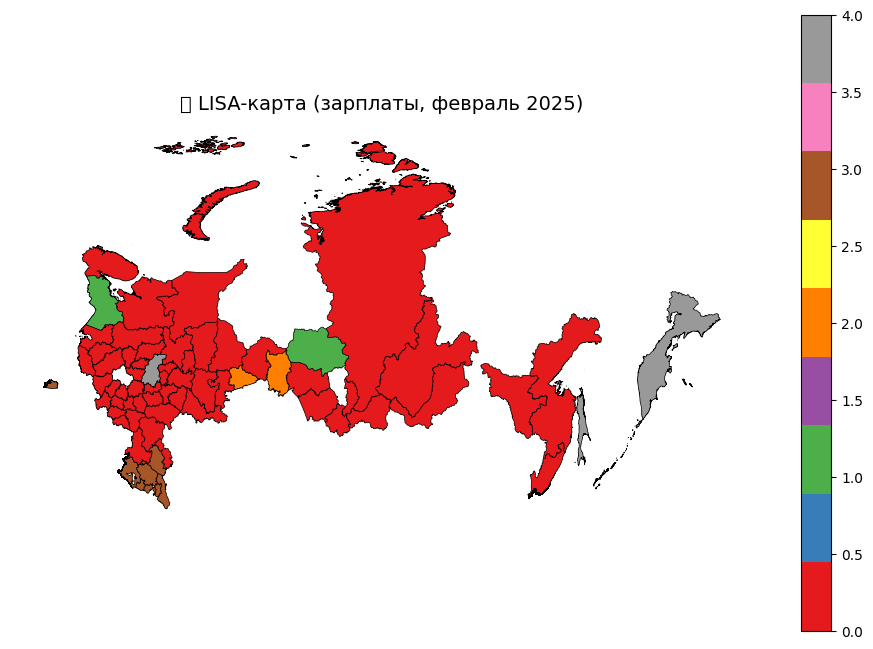

In [ ]:
import geopandas as gpd
import pandas as pd
from esda import Moran, Moran_Local
import libpysal
import matplotlib.pyplot as plt

gdf = gpd.read_file("/Users/k.chervaneva/Desktop/мфти учеба/Econometric/second_sem/gadm41_RUS_shp/gadm41_RUS_1.shp")

df_salary = pd.read_csv("salary_by_region_russia_feb2025.csv")

gdf = gdf.merge(df_salary, left_on='NAME_1', right_on='region', how='left')

gdf = gdf.dropna(subset=['salary'])

# Создаю матрицу пространственных весов по соседству
w = libpysal.weights.contiguity.Queen.from_dataframe(gdf)
w.transform = 'r'

# Глобальный Moran's I
moran = Moran(gdf['salary'], w)
print(f"📌 Global Moran’s I: {moran.I:.4f}")
print(f"   p-value: {moran.p_sim:.4f}")

# Локальный Moran (LISA)
lisa = Moran_Local(gdf['salary'], w)

#  в GeoDataFrame
gdf['lisa_cluster'] = lisa.q
gdf['lisa_p'] = lisa.p_sim
gdf['cluster_sig'] = gdf.apply(
    lambda row: row['lisa_cluster'] if row['lisa_p'] < 0.05 else 0, axis=1
)

# Визуализация LISA-карт
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='cluster_sig',
         cmap='Set1',
         linewidth=0.5,
         edgecolor='black',
         legend=True,
         ax=ax)
ax.set_title('📍 LISA-карта (зарплаты, февраль 2025)', fontsize=14)
ax.axis('off')
plt.show()


#### Глобальный Moran’s I:

* **I = 0.297**
* **p-value = 0.003**


**Существенная положительная пространственная автокорреляция** — зарплаты в соседних регионах схожи.

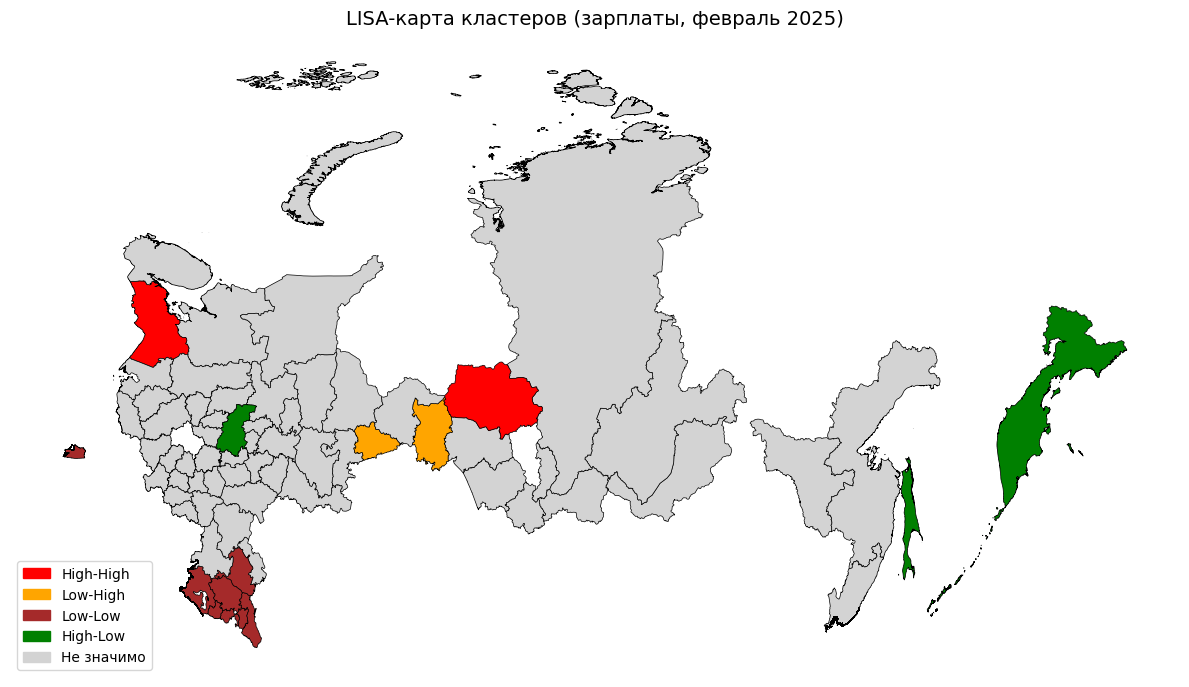

In [7]:
import matplotlib.pyplot as plt

# Назначим цвет для кластеров:
# 0 – незначимый (серый), 1 – HH, 2 – LH, 3 – LL, 4 – HL
cluster_colors = {
    0: 'lightgrey',
    1: 'red',
    2: 'orange',
    3: 'brown',
    4: 'green'
}

# Преобразуем в цвет
gdf['cluster_color'] = gdf['cluster_sig'].map(cluster_colors)

# Построим вручную (обеспечивает отображение всех)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(color=gdf['cluster_color'],
         linewidth=0.5,
         edgecolor='black',
         ax=ax)

# Оформим легенду
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='red', label='High-High'),
    mpatches.Patch(color='orange', label='Low-High'),
    mpatches.Patch(color='brown', label='Low-Low'),
    mpatches.Patch(color='green', label='High-Low'),
    mpatches.Patch(color='lightgrey', label='Не значимо'),
]
ax.legend(handles=legend_patches, loc='lower left', fontsize=10)

ax.set_title('LISA-карта кластеров (зарплаты, февраль 2025)', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


### LISA-анализ:

* **High-High кластеры**: Москва, Ленинградская область — высокая зарплата в окружении таких же.
* **Low-Low**: юг (например, Дагестан), часть Северного Кавказа.
* **High-Low** выбросы: Чукотка, Сахалин — богаты, но окружены бедными.
* **Low-High**: регионы, которые выделяются бедностью среди более благополучных (Курган, Омск)